In [1]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
directory=os.listdir('AudioWAV/')
print(len(directory))

7442


In [3]:
emotion= []
path= []
for audio_file in directory:
    if "ANG" in audio_file:
        emotion.append("Angry")
        path.append("AudioWAV/"+str(audio_file))
    if "HAP" in audio_file:
        emotion.append("Happy")
        path.append("AudioWAV/"+str(audio_file))
    if "SAD" in audio_file:
        emotion.append("Sad")
        path.append("AudioWAV/"+str(audio_file))
    if "FEA" in audio_file:
        emotion.append("Fear")
        path.append("AudioWAV/"+str(audio_file))
    if "DIS" in audio_file:
        emotion.append("Disgust")
        path.append("AudioWAV/"+str(audio_file))

In [4]:
df = pd.DataFrame({
    'Emotion': emotion,
    'Path': path
})


In [5]:
df["Emotion"].unique()

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad'], dtype=object)

In [6]:
file='AudioWAV/1001_DFA_DIS_XX.wav'

In [7]:
audio, sampling_rate = librosa.load(file)
print(audio)
print(sampling_rate)

[ 8.3351025e-04  1.2377766e-03  1.4888420e-03 ... -2.8161189e-06
  4.1507637e-06 -2.6017758e-06]
22050


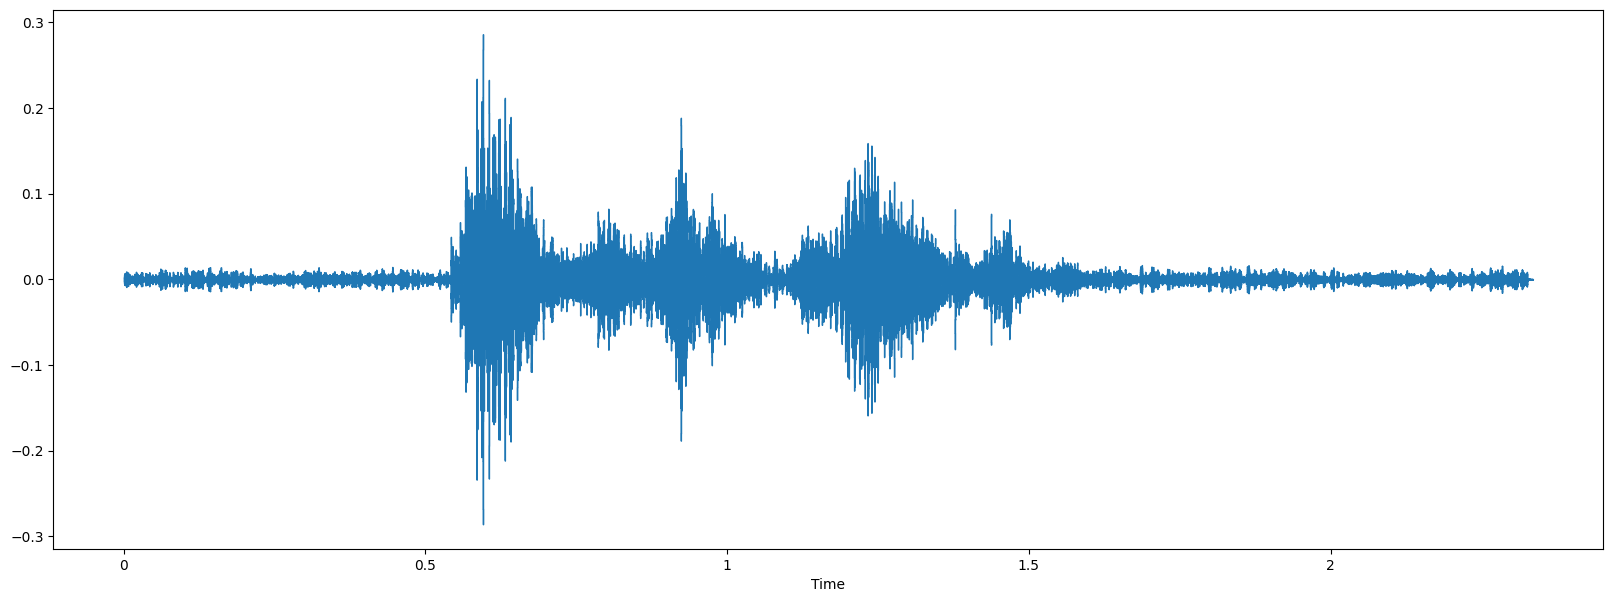

In [8]:
plt.figure(figsize=(20, 7))
librosa.display.waveshow(audio, sr=sampling_rate)

In [11]:
def feature_MFCC_Delta(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file, , sr=44100)
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=13,n_fft = int(0.025*sample_rate),hop_length=int(0.010*sample_rate))
    delta_mfcc = librosa.feature.delta(mfcc)
    mfcc_delta = np.concatenate((mfcc, delta_mfcc), axis=0)
    mfcc_delta_list = zip(*mfcc_delta)
    averages = [sum(sublist)/len(sublist) for sublist in mfcc_delta_list]
    return averages,mfcc,mfcc_delta
feature_MFCC_Delta(file)

([-15.818571255613978,
  -13.988651571222222,
  -13.44642296820306,
  -12.801758126427348,
  -13.151784933387088,
  -15.402676099768051,
  -14.796570479081801,
  -14.86347459657834,
  -13.461394602862688,
  -12.707545524606338,
  -14.132617133597915,
  -14.615499475254463,
  -13.834424950182438,
  -14.153155627660453,
  -15.60266843251884,
  -14.94601555662946,
  -15.09834896486539,
  -14.744281915517954,
  -14.452496470167087,
  -13.315961900955209,
  -14.239390845482166,
  -14.79720878142577,
  -13.188466470975142,
  -11.821657962523973,
  -9.825024824876051,
  -8.617879438858767,
  -10.076936666208963,
  -10.779315787439163,
  -11.687960357047045,
  -12.503755657718731,
  -12.121312389795024,
  -11.104479895188259,
  -11.764741029876928,
  -12.793797529660738,
  -11.729488965983574,
  -9.613572449709933,
  -8.27753359423234,
  -8.928876349272636,
  -9.94309724580783,
  -10.350852433878641,
  -11.307517431756983,
  -11.775334954834902,
  -11.635017251452574,
  -12.136689180364975,
  

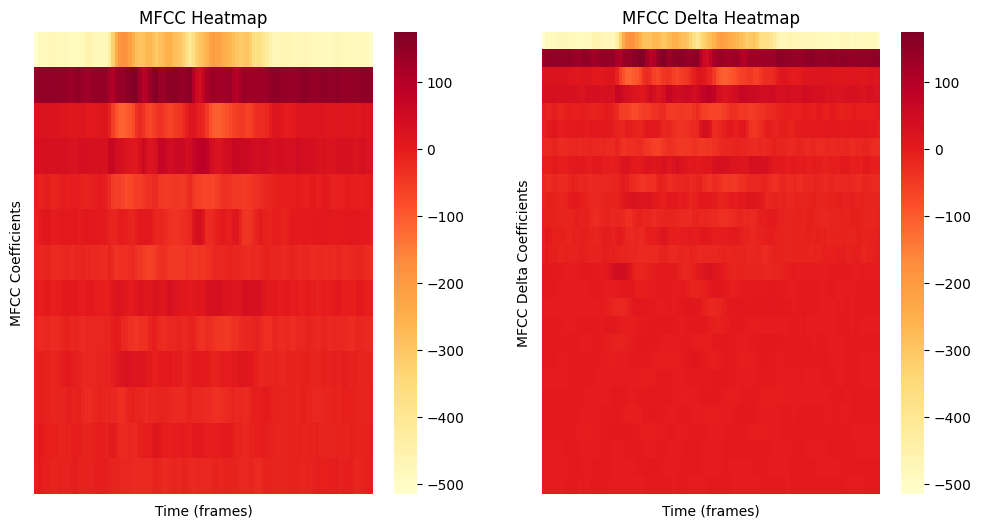

In [13]:
average_matrix,mfcc_matrix, mfcc_delta_matrix = feature_MFCC_Delta(file)
mfcc_df = pd.DataFrame(mfcc_matrix)
mfcc_delta_df = pd.DataFrame(mfcc_delta_matrix)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(mfcc_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('MFCC Heatmap')
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('MFCC Coefficients')
sns.heatmap(mfcc_delta_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('MFCC Delta Heatmap')
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('MFCC Delta Coefficients')
plt.show()

In [14]:
def feature_spectral_contrast(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file, , sr=44100)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate,n_fft = int(0.025*sample_rate),hop_length=int(0.010*sample_rate))
    spectral_contrast_list = zip(*spectral_contrast)
    averages = [sum(sublist)/len(sublist) for sublist in spectral_contrast_list]
    return averages
feature_spectral_contrast(file)

[10.451175629400817,
 12.495767628247448,
 22.494604342477924,
 20.486869292873557,
 20.164543625683255,
 20.982168396976892,
 20.45568048944885,
 20.21906815808591,
 19.992891229150597,
 20.702168928984054,
 20.09680107026614,
 19.778486328234017,
 19.934828094381714,
 20.39248432477996,
 21.293325970096223,
 19.96025916559604,
 19.912734764326416,
 19.5958833847619,
 20.079232039368982,
 20.70683316417768,
 20.587807216074356,
 21.90369947797882,
 20.868497714711047,
 23.057701320449354,
 22.403336010509957,
 24.012535787752885,
 26.51013925552081,
 23.48326988815327,
 24.138117159648036,
 21.10230659071328,
 22.02923299665008,
 22.293074387757112,
 24.846416958589835,
 21.05170715131718,
 25.349525568527667,
 22.580678466291346,
 22.997022919923914,
 20.666400304817678,
 21.489568689346218,
 24.08411374767696,
 23.567947197024832,
 24.2932366293899,
 27.10006836137747,
 26.747422478843514,
 24.716340332446855,
 23.951466989237865,
 25.23065203608294,
 22.264860442146993,
 21.5722874

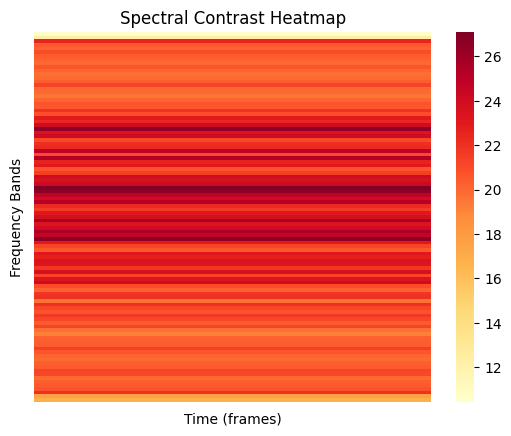

In [15]:
spectral_contrast_matrix = feature_spectral_contrast(file)
spec_df = pd.DataFrame(spectral_contrast_matrix)

sns.heatmap(spec_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [ ]:
def feature_chroma(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    return chroma
feature_chroma(file)

array([[0.5471633 , 0.4312024 , 0.5559839 , ..., 0.862271  , 0.54647845,
        0.26350087],
       [0.62393755, 1.        , 0.89660627, ..., 1.        , 0.60756516,
        0.4252371 ],
       [0.5962417 , 0.5171733 , 0.3421908 , ..., 0.3888431 , 0.15506461,
        0.21568894],
       ...,
       [0.33175498, 0.39589563, 1.        , ..., 0.2256742 , 1.        ,
        1.        ],
       [0.6427184 , 0.70052767, 0.7428009 , ..., 0.5738907 , 0.9015734 ,
        0.8960349 ],
       [0.6348721 , 0.39258838, 0.212342  , ..., 0.44548276, 0.24763088,
        0.3100314 ]], dtype=float32)

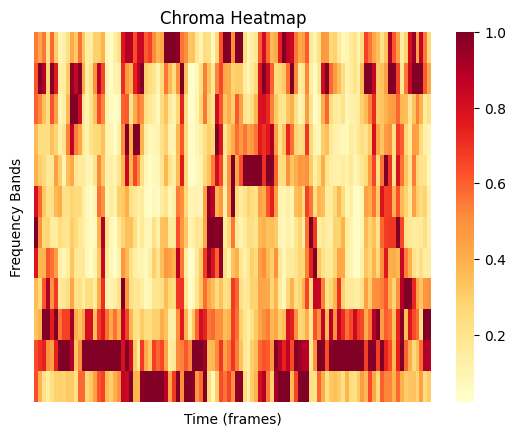

In [ ]:
chroma_matrix = feature_chroma(file)
chroma_df = pd.DataFrame(chroma_matrix)

sns.heatmap(chroma_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Chroma Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [ ]:
def feature_zero_crossing(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
    return zero_crossing

feature_zero_crossing(file)

array([[0.01660156, 0.02148438, 0.02929688, 0.02880859, 0.02539062,
        0.02636719, 0.02539062, 0.02734375, 0.03173828, 0.03222656,
        0.03125   , 0.03515625, 0.02832031, 0.03222656, 0.04394531,
        0.03613281, 0.04150391, 0.03759766, 0.02587891, 0.02929688,
        0.03027344, 0.03613281, 0.07128906, 0.08789062, 0.09863281,
        0.10839844, 0.08691406, 0.08007812, 0.06738281, 0.06152344,
        0.08935547, 0.13476562, 0.14697266, 0.14550781, 0.11669922,
        0.06445312, 0.06396484, 0.06982422, 0.06298828, 0.06738281,
        0.06591797, 0.06103516, 0.06396484, 0.06005859, 0.05029297,
        0.04394531, 0.07714844, 0.171875  , 0.24755859, 0.27197266,
        0.25244141, 0.17041016, 0.10986328, 0.10400391, 0.10888672,
        0.12109375, 0.13085938, 0.12402344, 0.13818359, 0.14306641,
        0.13671875, 0.13769531, 0.12548828, 0.11621094, 0.11523438,
        0.12060547, 0.11279297, 0.11474609, 0.09619141, 0.07324219,
        0.05175781, 0.02441406, 0.02441406, 0.03

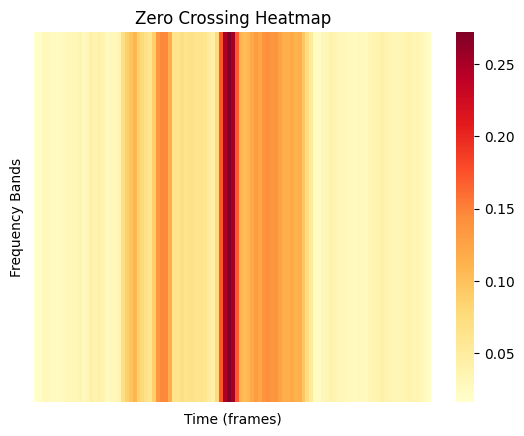

In [ ]:
zero_crossing_matrix = feature_zero_crossing(file)
zero_crossing_df = pd.DataFrame(zero_crossing_matrix)

sns.heatmap(zero_crossing_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Zero Crossing Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [ ]:
def feature_mel_spectograph(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr = sample_rate, n_fft = 2048, hop_length = 512, n_mels = 90)
    return mel_spectrogram

feature_mel_spectograph(file)

array([[8.9614221e-04, 2.7881179e-03, 7.5614713e-03, ..., 1.1609517e-03,
        7.1740575e-04, 8.7136304e-04],
       [1.4988275e-03, 5.5494537e-03, 1.5550783e-02, ..., 5.3542256e-02,
        2.5819054e-02, 8.0040703e-03],
       [1.9665882e-02, 1.4976438e-02, 1.3008903e-02, ..., 6.4552374e-02,
        3.9560940e-02, 3.1460647e-02],
       ...,
       [9.2497912e-09, 2.3017195e-09, 7.0139159e-17, ..., 2.2521780e-16,
        4.4967577e-15, 2.7943424e-13],
       [8.9714067e-09, 2.2326720e-09, 2.1171570e-16, ..., 5.0700084e-16,
        4.1677625e-15, 2.4191025e-13],
       [8.8208543e-09, 2.1953686e-09, 2.3535730e-17, ..., 3.4734254e-17,
        3.4682829e-15, 2.2105175e-13]], dtype=float32)

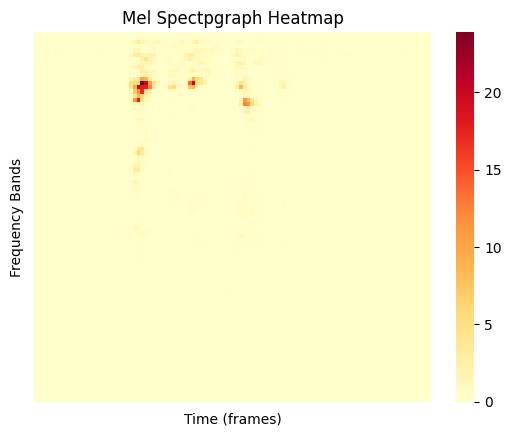

In [ ]:
mel_spectograph_matrix = feature_mel_spectograph(file)
mel_spectograph_df = pd.DataFrame(mel_spectograph_matrix)

sns.heatmap(mel_spectograph_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Mel Spectpgraph Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [17]:
def feature_concat(file):
    mfcc_delta=feature_MFCC_Delta(file)[0]
    #zero_crossing=feature_zero_crossing(file)
    #chroma=feature_chroma(file)
    spectral_contrast=feature_spectral_contrast(file)
    #mel_spectpgraph=feature_mel_spectograph(file)
    #features = np.concatenate((mfcc_delta, spectral_contrast, chroma, zero_crossing,mel_spectpgraph), axis=0)
    features = np.concatenate((mfcc_delta,spectral_contrast), axis=0)
    return features
    
feature_concat(file)

array([-15.81857126, -13.98865157, -13.44642297, -12.80175813,
       -13.15178493, -15.4026761 , -14.79657048, -14.8634746 ,
       -13.4613946 , -12.70754552, -14.13261713, -14.61549948,
       -13.83442495, -14.15315563, -15.60266843, -14.94601556,
       -15.09834896, -14.74428192, -14.45249647, -13.3159619 ,
       -14.23939085, -14.79720878, -13.18846647, -11.82165796,
        -9.82502482,  -8.61787944, -10.07693667, -10.77931579,
       -11.68796036, -12.50375566, -12.12131239, -11.1044799 ,
       -11.76474103, -12.79379753, -11.72948897,  -9.61357245,
        -8.27753359,  -8.92887635,  -9.94309725, -10.35085243,
       -11.30751743, -11.77533495, -11.63501725, -12.13668918,
       -13.26348971, -12.6234127 , -11.94344385, -11.04852809,
       -11.03691653, -10.97840744, -11.13826996, -10.95633293,
       -11.09865932, -11.23655291, -11.79304012, -11.69065247,
       -10.68014506, -10.57631247,  -9.98725271, -10.09959089,
       -11.89991106, -12.28497351, -11.97323344, -12.37

In [18]:
print(len(directory))  

7442


In [19]:
feature=[]
for data in directory:
    if "NEU" in data:
        continue
    else:
        data="AudioWAV/"+str(data)
        f=feature_concat(data)
        feature.append(f)


In [20]:
df = pd.DataFrame({'Emotion': emotion,
                   'Path': path})

In [21]:
feature_df=pd.DataFrame({"Feature":feature})

In [22]:
df

,Emotion,Path
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav
...,...,...
6350,Angry,AudioWAV/1091_WSI_ANG_XX.wav
6351,Disgust,AudioWAV/1091_WSI_DIS_XX.wav
6352,Fear,AudioWAV/1091_WSI_FEA_XX.wav
6353,Happy,AudioWAV/1091_WSI_HAP_XX.wav


In [23]:
feature_df

,Feature
0,"[-23.721558165449935, -16.666732359104433, -14..."
1,"[-15.818571255613978, -13.988651571222222, -13..."
2,"[-14.738985638062541, -15.413308802562264, -15..."
3,"[-14.016548066471632, -13.911194309878807, -15..."
4,"[-15.951292142271996, -13.776107122118656, -13..."
...,...
6350,"[-12.94114270211699, -12.95438493308253, -13.9..."
6351,"[-13.863371119046441, -12.988192410566485, -12..."
6352,"[-12.232572230868614, -12.828657233657745, -12..."
6353,"[-12.580773347845444, -11.925999819086147, -11..."


In [28]:
feature_df['Feature'][0]

array([-23.72155817, -16.66673236, -14.93116232, -14.11434993,
       -13.74807891, -14.23078133, -14.18379469, -14.3794833 ,
       -14.59335494, -15.17349534, -14.5078526 , -14.35141176,
       -15.60803113, -15.17399745, -14.53752378, -14.33113301,
       -14.01224137, -11.80102895,  -8.62631272,  -6.18851189,
        -6.56380975,  -8.28083781,  -9.5388731 , -12.33639044,
       -11.73425435, -12.07538412, -12.11010315, -11.55541453,
       -11.41653296, -12.2497804 , -13.1528729 , -11.25938072,
       -11.65516273, -12.58412211, -11.00932254, -10.29246918,
       -10.36478076,  -8.53187924,  -8.61815616,  -9.09230377,
        -9.9072547 ,  -9.21346178,  -8.23476799,  -9.14555442,
       -10.58541005,  -9.69945468,  -9.75984838,  -9.60602412,
       -10.40919559, -10.77116729, -10.0280472 ,  -9.22548814,
        -9.05199703,  -8.49345007,  -8.32749769,  -8.44090114,
       -10.37044106, -11.82608515, -11.08205507, -11.66136064,
       -10.93524767, -10.92702902, -10.92648329, -11.30

In [26]:
df = pd.concat([df,pd.DataFrame(feature_df['Feature'].values.tolist())],axis=1)

In [29]:
df.head()

,Emotion,Path,0,1,2,3,4,5,6,7,...,422,423,424,425,426,427,428,429,430,431
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,-23.721558,-16.666732,-14.931162,-14.114350,-13.748079,-14.230781,-14.183795,-14.379483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,-15.818571,-13.988652,-13.446423,-12.801758,-13.151785,-15.402676,-14.796570,-14.863475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,-14.738986,-15.413309,-15.898115,-15.301645,-14.837297,-14.980101,-14.888606,-14.279239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,-14.016548,-13.911194,-15.216611,-16.847115,-14.763308,-13.762990,-13.970798,-13.917288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,-15.951292,-13.776107,-13.905651,-14.878574,-14.484025,-14.498131,-14.076248,-14.529651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df = df.fillna(0)

In [31]:
df

,Emotion,Path,0,1,2,3,4,5,6,7,...,422,423,424,425,426,427,428,429,430,431
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,-23.721558,-16.666732,-14.931162,-14.114350,-13.748079,-14.230781,-14.183795,-14.379483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,-15.818571,-13.988652,-13.446423,-12.801758,-13.151785,-15.402676,-14.796570,-14.863475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,-14.738986,-15.413309,-15.898115,-15.301645,-14.837297,-14.980101,-14.888606,-14.279239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,-14.016548,-13.911194,-15.216611,-16.847115,-14.763308,-13.762990,-13.970798,-13.917288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,-15.951292,-13.776107,-13.905651,-14.878574,-14.484025,-14.498131,-14.076248,-14.529651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Angry,AudioWAV/1091_WSI_ANG_XX.wav,-12.941143,-12.954385,-13.991969,-12.462370,-11.486502,-11.021775,-12.197065,-14.339192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6351,Disgust,AudioWAV/1091_WSI_DIS_XX.wav,-13.863371,-12.988192,-12.800383,-12.271212,-12.026648,-11.919976,-12.602052,-13.051036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6352,Fear,AudioWAV/1091_WSI_FEA_XX.wav,-12.232572,-12.828657,-12.535020,-13.451048,-13.666031,-12.637713,-13.373614,-12.593018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6353,Happy,AudioWAV/1091_WSI_HAP_XX.wav,-12.580773,-11.926000,-11.920256,-12.426946,-13.144195,-13.253181,-12.429048,-11.782009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
